# Case

![New York City schoolbus](../schoolbus.jpg)


<br>

Every year, American high school students take SATs, which are standardized tests intended to measure literacy, numeracy, and writing skills. There are three sections - reading, math, and writing, each with a **maximum score of 800 points**. These tests are extremely important for students and colleges, as they play a pivotal role in the admissions process.

Analyzing the performance of schools is important for a variety of stakeholders, including policy and education professionals, researchers, government, and even parents considering which school their children should attend. 

You have been provided with a dataset called `schools.csv`, which is previewed below.

You have been tasked with answering three key questions about New York City (NYC) public school SAT performance.

## Install Requirements

In [3]:
# Install requirements
#!pip install pandas
#!pip install matplotlib
!pip install -r ../requirements.txt

/bin/bash: warning: setlocale: LC_ALL: cannot change locale (en_US.UTF-8)


## Import libraries

In [43]:
# Import Pandas
import pandas as pd
import matplotlib.pyplot as plt
from src.visualization import plot_null_values, plot_score_distribution, save_analysis_results
from src.data_processing import load_schools_data, clean_data, calculate_total_sat, get_math_threshold
from src.analysis import get_best_math_schools, get_top_schools_by_total_sat, get_largest_std_borough
import sys

sys.path.append('../')


## Load the project file

In [10]:
data_path = "../data/raw/schools.csv"
schools = load_schools_data(data_path)

## First data analysis

In [11]:
# Preview the data
schools.head()

,school_name,borough,building_code,average_math,average_reading,average_writing,percent_tested
0,"New Explorations into Science, Technology and ...",Manhattan,M022,657,601,601,NaN
1,Essex Street Academy,Manhattan,M445,395,411,387,78.9
2,Lower Manhattan Arts Academy,Manhattan,M445,418,428,415,65.1
3,High School for Dual Language and Asian Studies,Manhattan,M445,613,453,463,95.9
4,Henry Street School for International Studies,Manhattan,M056,410,406,381,59.7


# Analyzing Data

## EAD - Exploratory Data Analysis

In [12]:
# View all dimensions
dimensions = schools.shape
print(f"Dimensions: {dimensions}")

Dimensions: (375, 7)


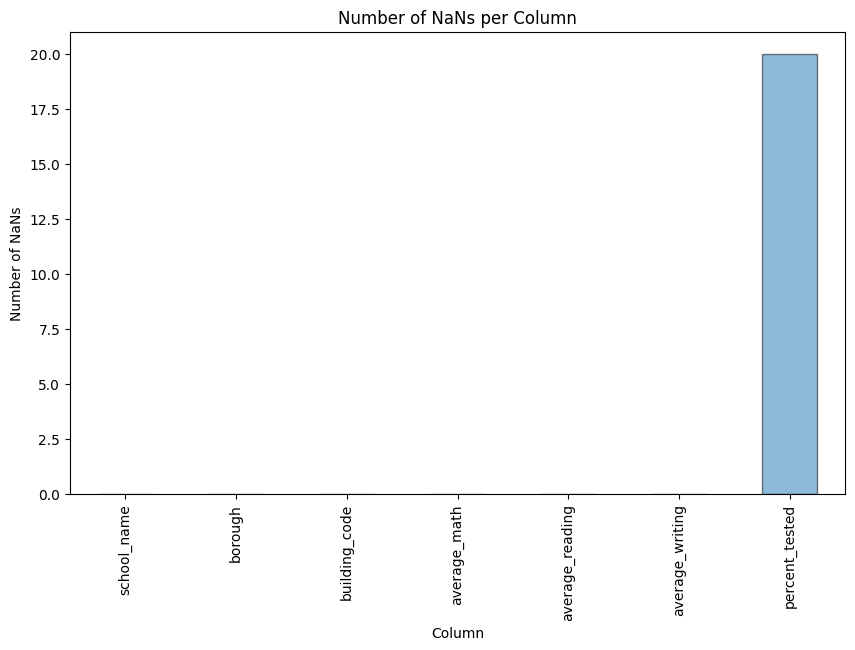

In [16]:
# save the figure .png
# Verifying if NaN
plot_null_values(schools, output_path='../outputs/figures/null_values.png')

In [17]:
# Drop NaNs values
schools_without_nans = clean_data(schools)
schools_without_nans.shape

(355, 7)

In [8]:
# Some statistics from NYC Schools Data
schools.describe()

,average_math,average_reading,average_writing,percent_tested
count,375.000000,375.000000,375.000000,355.000000
mean,432.944000,424.504000,418.458667,64.976338
std,71.952373,61.881069,64.548599,18.747634
min,317.000000,302.000000,284.000000,18.500000
25%,386.000000,386.000000,382.000000,50.950000
50%,415.000000,413.000000,403.000000,64.800000
75%,458.500000,445.000000,437.500000,79.600000
max,754.000000,697.000000,693.000000,100.000000


In [9]:
# Data types
schools.dtypes

school_name         object
borough             object
building_code       object
average_math         int64
average_reading      int64
average_writing      int64
percent_tested     float64
dtype: object

### Understanding data distribution

First, we have to understand how it works the distribution of numerical variables:

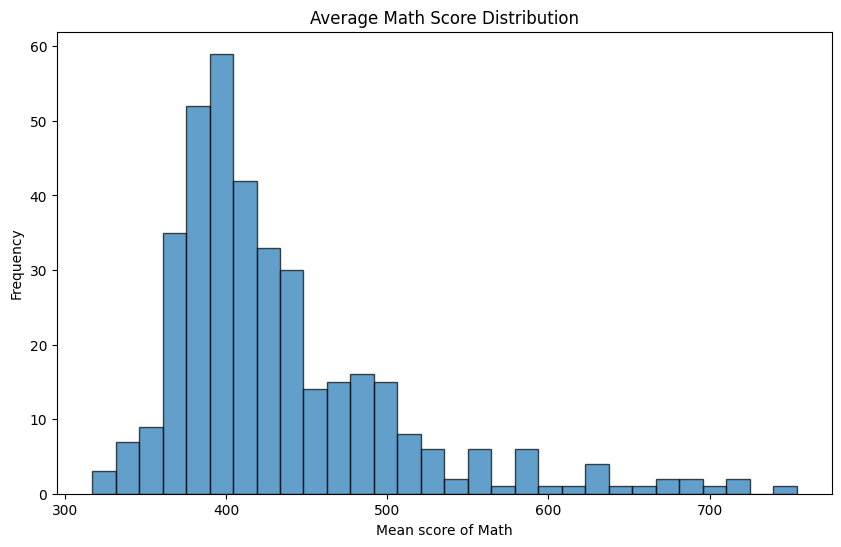

In [48]:
# Schools distribution of Math score
plot_score_distribution(schools, 'average_math', 'Average Math Score Distribution', 'Mean score of Math', output_path='../outputs/figures/score_distribution.png')

> The best math results are at least 80% of the *maximum possible score of 800* for math.

In [22]:
# Calculating the minimum math best score
minimum_math_best_score = get_math_threshold()
print(f"Minimum Math Best Score: {minimum_math_best_score}")

Minimum Math Best Score: 640.0


## Which NYC schools have the best math results?

In [44]:
# getting the best math results
schools_best_math = get_best_math_schools(schools, minimum_math_best_score)
#Save result
save_analysis_results(schools_best_math, 'schools_best_math', output_dir='../outputs/reports')
schools_best_math

Results saved to: ../outputs/reports/schools_best_math.csv


,school_name,average_math
88,Stuyvesant High School,754
170,Bronx High School of Science,714
93,Staten Island Technical High School,711
365,Queens High School for the Sciences at York Co...,701
68,"High School for Mathematics, Science, and Engi...",683
280,Brooklyn Technical High School,682
333,Townsend Harris High School,680
174,High School of American Studies at Lehman College,669
0,"New Explorations into Science, Technology and ...",657
45,Eleanor Roosevelt High School,641


## What are the top 10 performing schools based on the combined SAT scores?

In [45]:
# Calculating the Total SAT
total_SAT = calculate_total_sat(schools)['total_SAT']
# Ordination
top_10_schools = get_top_schools_by_total_sat(schools, 10)
#Save result
save_analysis_results(top_10_schools, 'top_10_schools', output_dir='../outputs/reports')
top_10_schools

Results saved to: ../outputs/reports/top_10_schools.csv


,school_name,total_SAT
88,Stuyvesant High School,2144
93,Staten Island Technical High School,2041
170,Bronx High School of Science,2041
174,High School of American Studies at Lehman College,2013
333,Townsend Harris High School,1981
365,Queens High School for the Sciences at York Co...,1947
5,Bard High School Early College,1914
280,Brooklyn Technical High School,1896
68,"High School for Mathematics, Science, and Engi...",1889
45,Eleanor Roosevelt High School,1889


### Review table

In [34]:
schools.head()

,school_name,borough,building_code,average_math,average_reading,average_writing,percent_tested,total_SAT
0,"New Explorations into Science, Technology and ...",Manhattan,M022,657,601,601,NaN,1859
1,Essex Street Academy,Manhattan,M445,395,411,387,78.9,1193
2,Lower Manhattan Arts Academy,Manhattan,M445,418,428,415,65.1,1261
3,High School for Dual Language and Asian Studies,Manhattan,M445,613,453,463,95.9,1529
4,Henry Street School for International Studies,Manhattan,M056,410,406,381,59.7,1197


## Which single borough has the largest standard deviation in the combined SAT score?

### Getting the standard deviation

In [46]:
# standard deviation of "total_SAT"
largest_std_dev = get_largest_std_borough(schools)
#Save Result
save_analysis_results(largest_std_dev, 'largest_std_dev', output_dir='../outputs/reports')
largest_std_dev

Results saved to: ../outputs/reports/largest_std_dev.csv


,num_schools,average_SAT,std_SAT
borough,,,
Manhattan,89,1340.13,230.29
